# W5 Final Project

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

# Step 1. Gather data, determine the method of data collection and provenance of the data

About the dataset
It's about gym member exercise information from Kaggle. It's very import to know the relation for Gender, Fat_Percentage, Calories_Burned ...etc.
I'll extrace the dataset and compare this.

- Gender: Male and Female
- Fat_Percentage: the fate percentage.
- BMI: Body Mass Index
- Calories_Burned: it can know what exrcise can help and it's any relation with gender, age, BMI...etc.

By understanding the collection and provenance of this dataset, it's helpful to know what's more positive relation for Calories_Burned.


In [82]:
df=pd.read_csv('/content/gym_members_exercise_tracking.csv')
#df
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [84]:
df.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


In [85]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


<Axes: xlabel='Workout_Type', ylabel='count'>

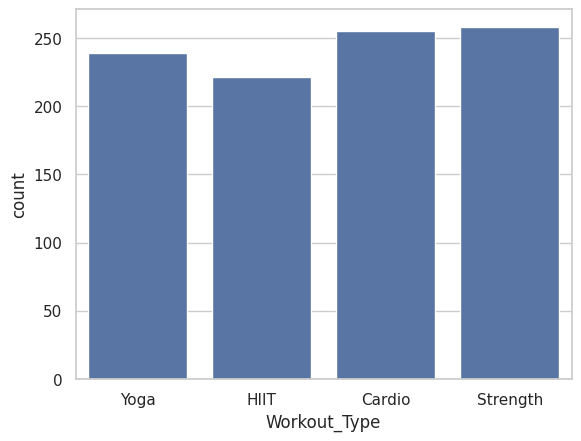

In [86]:
sns.countplot(data=df, x='Workout_Type')

<Axes: xlabel='Age', ylabel='Workout_Type'>

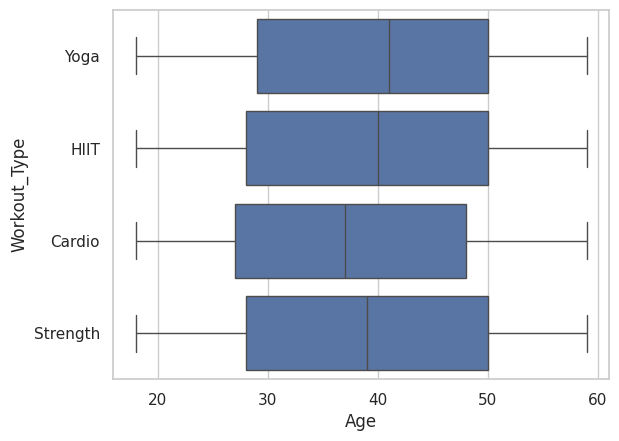

In [87]:
sns.boxplot(data = df, x = 'Age', y='Workout_Type')

Gender vs. Weight

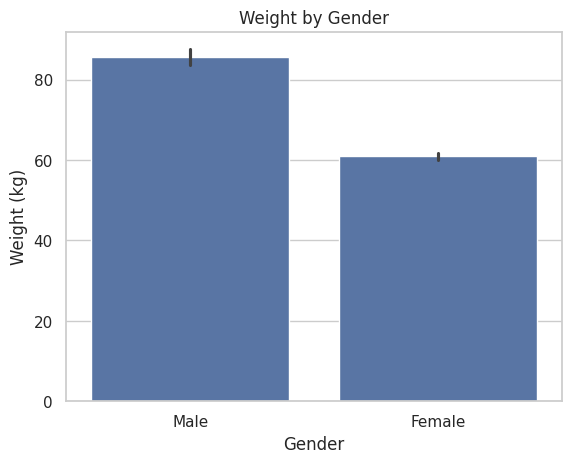

In [88]:
plt.figure()
sns.barplot(x='Gender',y='Weight (kg)',data=df)
plt.title('Weight by Gender')
plt.show()

Gender vs. Height

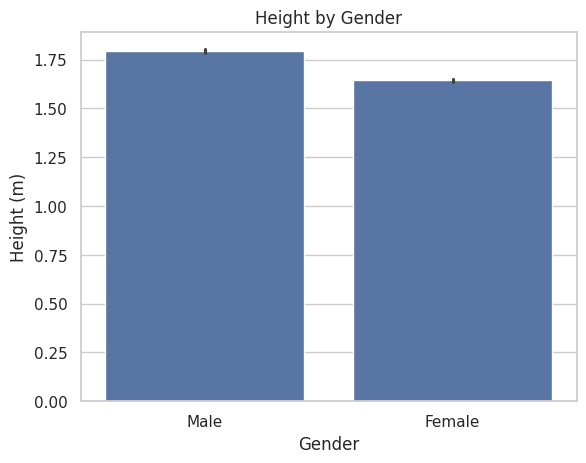

In [89]:
plt.figure()
sns.barplot(x='Gender',y='Height (m)',data=df)
plt.title('Height by Gender')
plt.show()

Gender vs. Max BPM

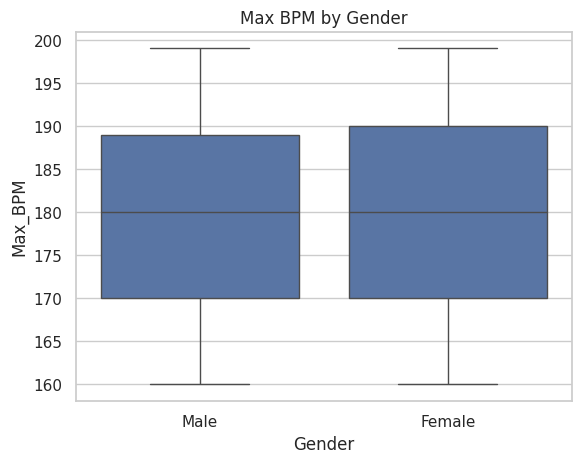

In [90]:
plt.figure()
sns.boxplot(x='Gender',y='Max_BPM',data=df)
plt.title('Max BPM by Gender')
plt.show()

Workout Type vs. Gender

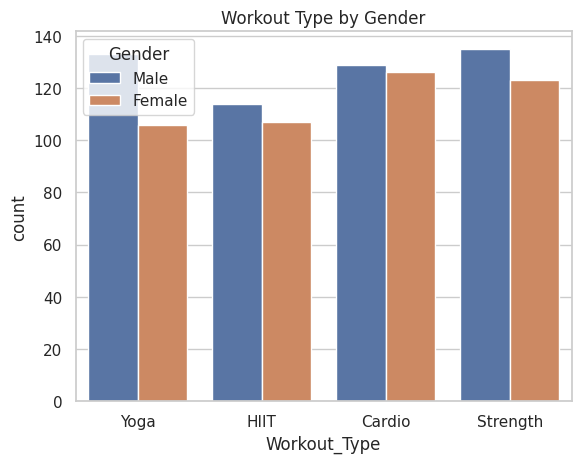

In [91]:
plt.figure()
sns.countplot(hue='Gender',x='Workout_Type',data=df)
plt.title('Workout Type by Gender')
plt.show()

# Step 2. Identify an Unsupervised Learning Problem

In [93]:
summary_statistics = df.describe()
print(summary_statistics)

missing_values = df.isnull().sum()
print(missing_values)


              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

# Step3. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

Data Visualize
Visual tools are essential for understanding the distribution of data:

- Histograms for each feature can help understand the distribution and identify any skewness.
- Box-plots can be used to visualize the summary statistics and detect outliers.
- Scatter plots could be helpful to visualize the relationships between pairs of features.

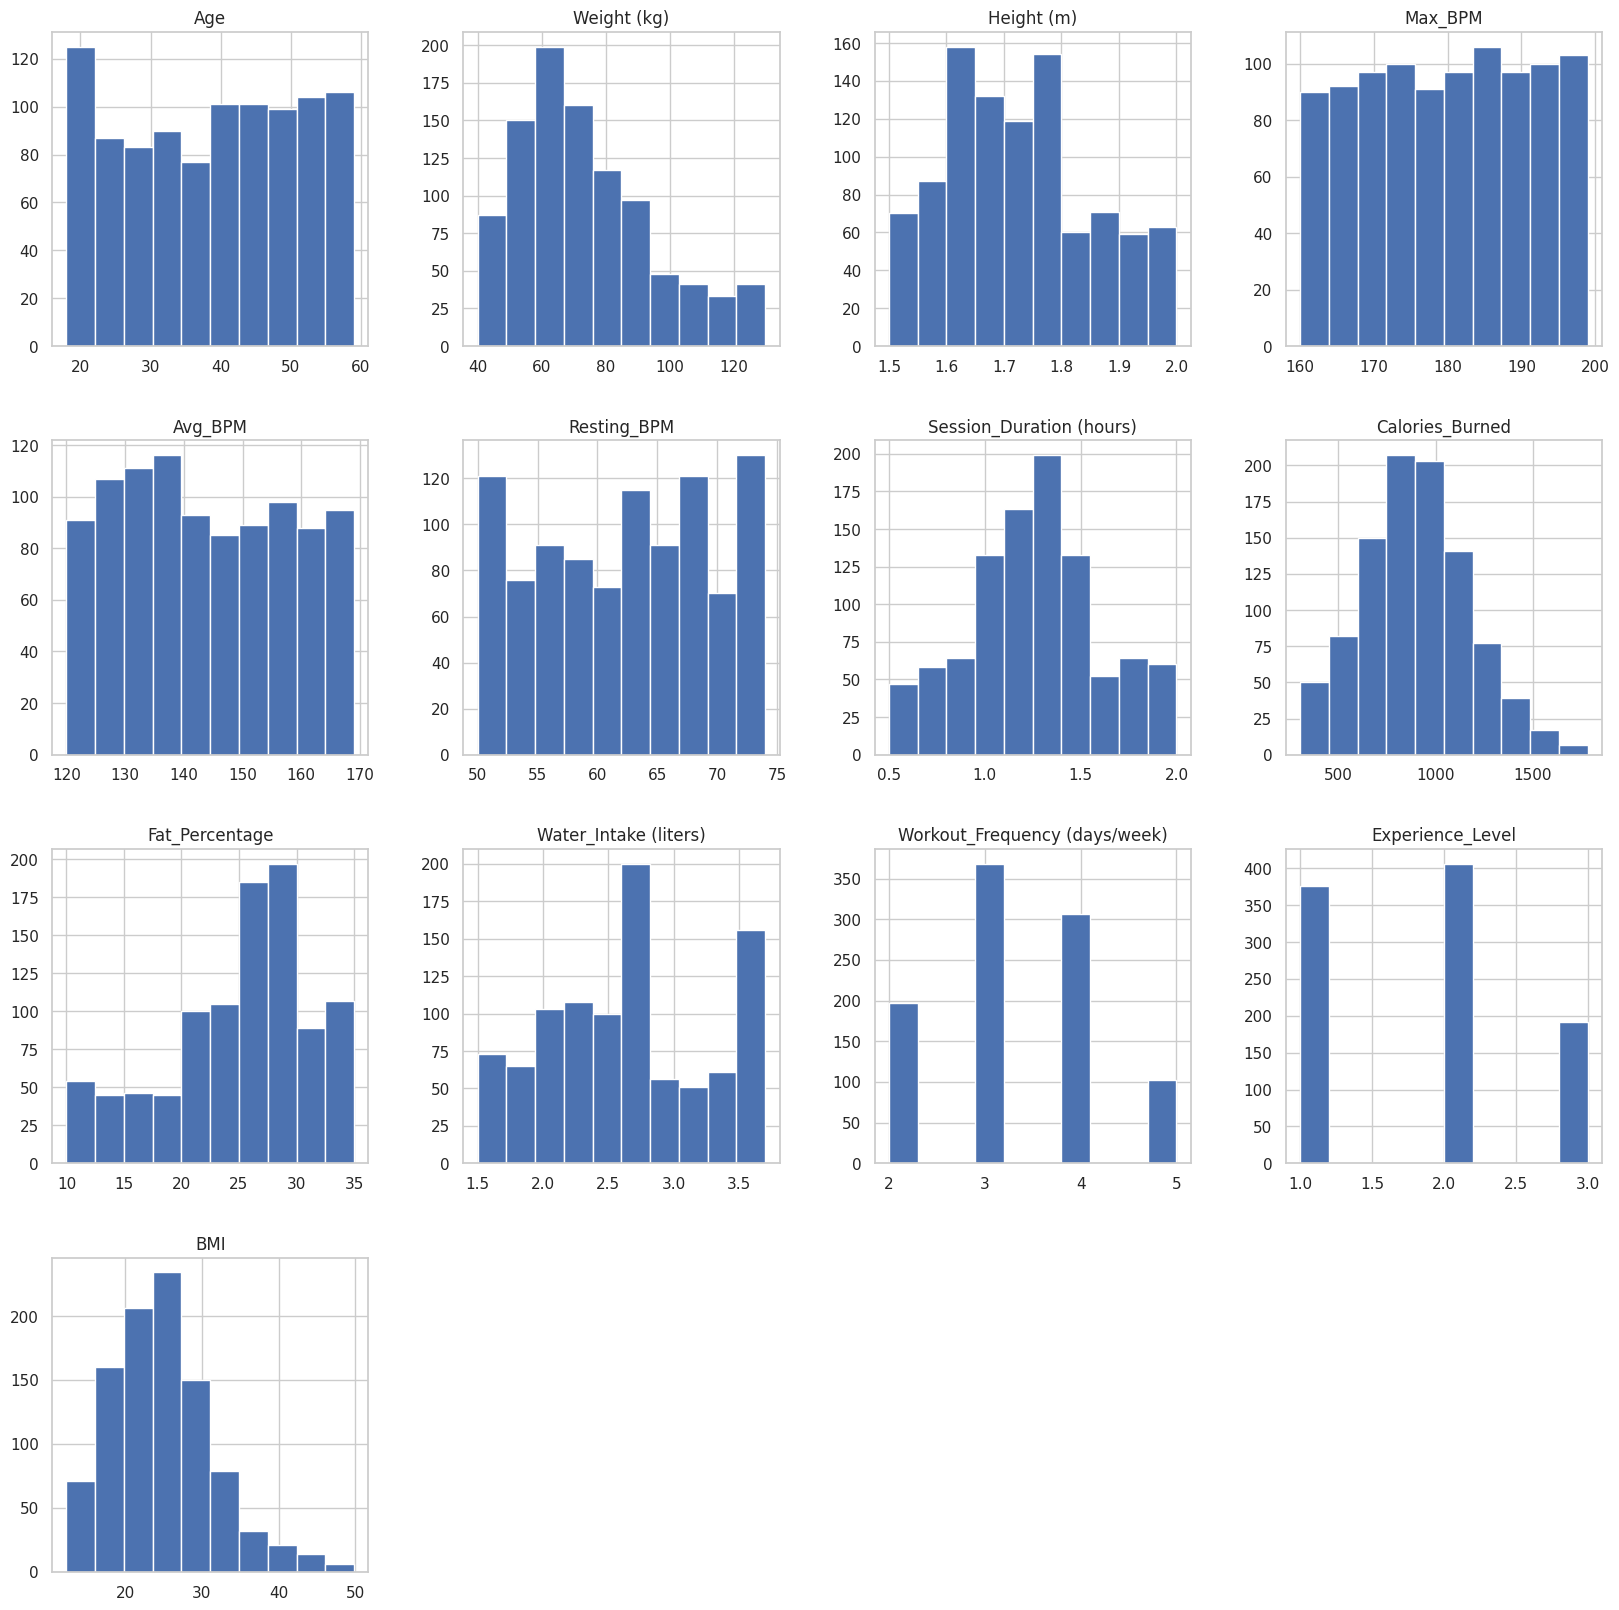

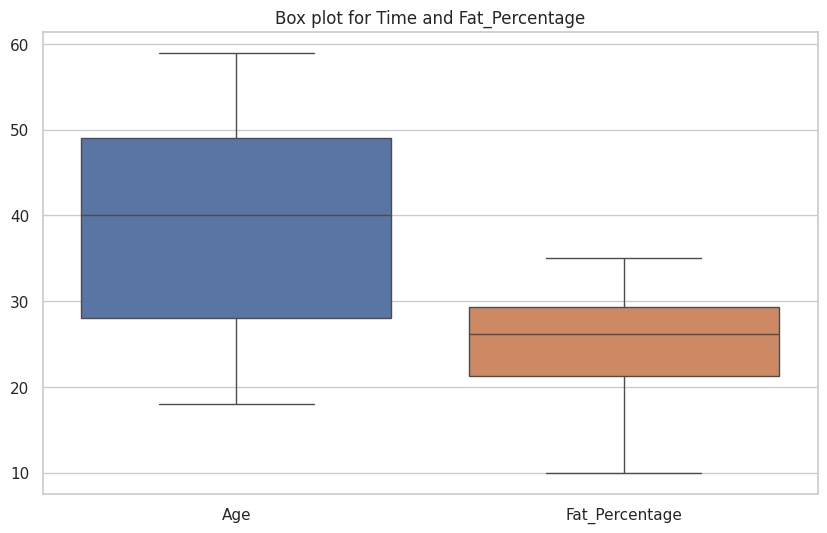

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df.hist(figsize=(20,20))
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'Fat_Percentage']])
plt.title('Box plot for Time and Fat_Percentage')
plt.show()

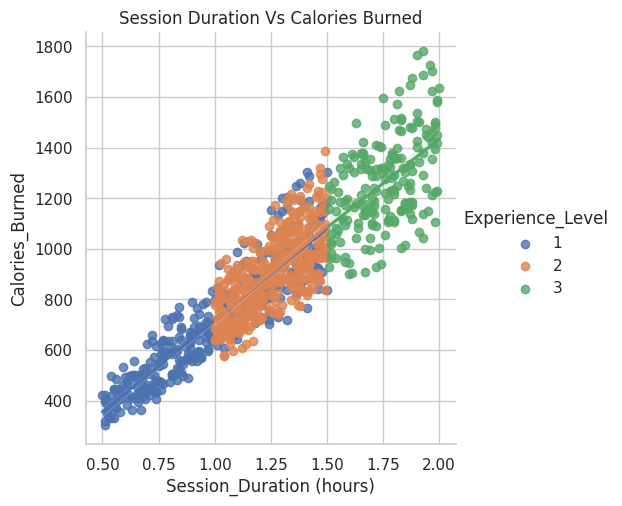

In [95]:
sns.lmplot( data=df , x="Session_Duration (hours)", y="Calories_Burned", hue="Experience_Level")
plt.title('Session Duration Vs Calories Burned')
plt.show()

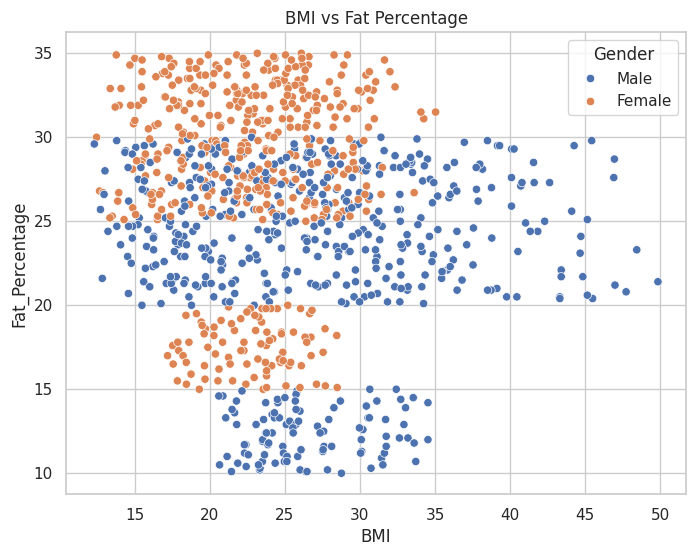

In [97]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='BMI', y='Fat_Percentage',hue = 'Gender', data=df)
plt.title('BMI vs Fat Percentage')
plt.show()

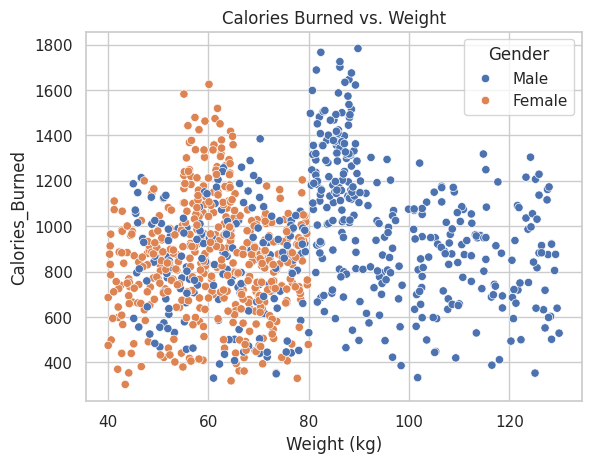

In [98]:
sns.scatterplot(x='Weight (kg)', y='Calories_Burned',hue = 'Gender', data=df)
plt.title('Calories Burned vs. Weight')
plt.show()

Data Cleaning

In [99]:
Q1 = df['Calories_Burned'].quantile(0.25)
Q3 = df['Calories_Burned'].quantile(0.75)
IQR = Q3-Q1

min = Q1 - 1.5* IQR
MAX = Q3 + 1.5* IQR

df['Calories_Burned'] = np.where(df['Calories_Burned'] < min, min, df['Calories_Burned'])
df['Calories_Burned'] = np.where(df['Calories_Burned'] > MAX, MAX, df['Calories_Burned'])

In [100]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3-Q1

min = Q1 - 1.5* IQR
MAX = Q3 + 1.5* IQR

df['BMI'] = np.where(df['BMI'] < min, min, df['BMI'])
df['BMI'] = np.where(df['BMI'] > MAX, MAX, df['BMI'])

In [101]:
df['Gender'].value_counts()

,count
Gender,
Male,511
Female,462


Data Transformed

In [102]:
changes = {'Male': 0, 'Female':1}
df['Gender'] = df['Gender'].map(changes)
df['Gender'].head()

,Gender
0,0
1,1
2,1
3,0
4,0


Data Correlation

In [103]:
df['Workout_Type'].value_counts()
changes2 = {'Strength': 0, 'Cardio':1, 'Yoga':2, 'HIIT':3}
df['Workout_Type'] = df['Workout_Type'].map(changes2)
df['Workout_Type'].head()

,Workout_Type
0,2
1,3
2,1
3,0
4,0


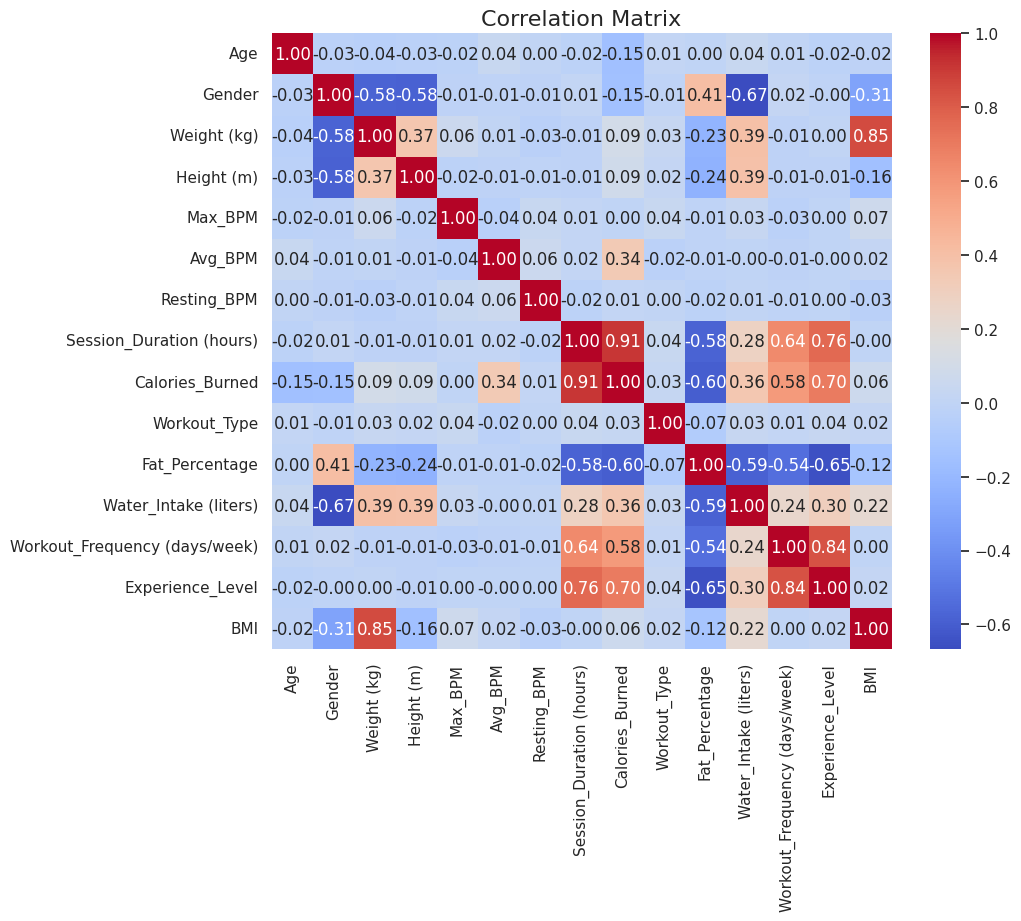

In [104]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Step 4. Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions


Models
Data Preprocessing: The dataset was scaled using MinMaxScaler, ensuring that all features were normalized within a specific range (0 to 1), which is crucial for models like Logistic Regression and SVM that are sensitive to feature scaling.
Train-Test Split:

The data was divided into training and testing sets, with 15% of the data reserved for testing. The shuffle=True parameter ensured randomization, and random_state=36 was used for reproducibility.
Logistic Regression Model:

In [105]:
threshold = 0.03
correlation = df.corr()
high_corr_features = correlation.index[abs(correlation['Calories_Burned']) > threshold].tolist()
high_corr_features.remove('Calories_Burned')
print('Selected features based on corrolation with target:')
print(high_corr_features)
X_selected = df[high_corr_features]
y = df['Calories_Burned']

Selected features based on corrolation with target:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [106]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_selected)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, shuffle = True, random_state=36)

Logistic Regression Model: A Logistic Regression model was trained using the fit method on the training data.
The training score was calculated to evaluate the model's fit to the training data.

In [109]:
model = LogisticRegression()
X_train.shape

(875, 11)

In [110]:
model.fit(X_train, Y_train)

LogisticRegression()

In [111]:
model.score(X_train, Y_train)

0.04342857142857143

In [112]:
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.01020408163265306


Hyperparameter Tuning with GridSearchCV:

The best combination of hyperparameters was determined by fitting the grid search object on the training data.
The training score of the optimal SVM model was calculated.
Predictions were made on the test set, and the accuracy score was computed to evaluate the SVM's performance

In [113]:
param_grid = {
    'C':[0.1,1,10],
    'gamma':['scale',0.1,1,10],
    'kernel':['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=1)

In [114]:
grid_search.score(X_train, Y_train)

1.0

In [115]:
y_pred_grid = grid_search.predict(X_test)
print(accuracy_score(y_pred_grid, Y_test))

0.01020408163265306


# Conclusion

Accuracy was used as the primary evaluation metric for both models (Logistic Regression and SVM). The results provide insights into how well the models generalize to unseen data.

Logistic Regression Performance:
The Logistic Regression model achieved a certain level of accuracy (based on the print output) on the test set, indicating its ability to predict the target variable. However, being a linear model, its performance may be limited if the data contains non-linear relationships.


SVM with Hyperparameter Tuning:
The SVM model showed potentially improved accuracy compared to Logistic Regression after tuning key hyperparameters using GridSearchCV. This suggests that SVM, especially with the RBF kernel, might capture complex patterns in the data better than Logistic Regression.


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
models = {
    'linear Regression':LinearRegression(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor()

    }

In [120]:
result = {}
for model_name , model in models.items():
    model.fit(X_train , Y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test , y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test , y_pred))
    result[model_name] = {'r2_scoer':r2, 'RMSE':rmse}
model_df = pd.DataFrame(result).T
print(model_df)

                             r2_scoer       RMSE
linear Regression            0.983208  37.370933
Random Forest Regressor      0.976695  44.025944
Gradient Boosting Regressor  0.995856  18.565431
Decision Tree Regressor      0.953759  62.015387


Future work:
I add more models for testing (e.g., Decision Trees, Random Forests and evaluating performance using additional metrics like r2_scoer, and RMSE for more comprehensive insights.